In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras import layers



In [6]:
from tensorflow.keras.layers import Dense,Flatten

In [7]:
from tensorflow.keras.layers import Conv2D

In [8]:

from tensorflow.keras.optimizers import Adam


In [9]:
from tensorflow.python.keras.utils.np_utils import to_categorical

In [11]:
from keras.utils.np_utils import to_categorical


In [12]:
(x_train, y_train), (x_test, y_test)= mnist.load_data() 

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
y_train[0]

5

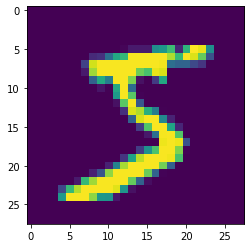

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [17]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [18]:
number_of_classes=10
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

In [22]:
model.add(Conv2D(32,(3,3),activation='relu'))

In [23]:
model.add(Flatten())

In [24]:
model.add(Dense(number_of_classes,activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 127s 67ms/step - loss: 0.2529 - accuracy: 0.9510 - val_loss: 0.1078 - val_accuracy: 0.9688
Epoch 2/20
1875/1875 [==============================] - 121s 65ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 3/20
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0979 - val_accuracy: 0.9753
Epoch 4/20
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0918 - val_accuracy: 0.9782
Epoch 5/20
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0927 - val_accuracy: 0.9792
Epoch 6/20
1875/1875 [==============================] - 125s 67ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.1275 - val_accuracy: 0.9754
Epoch 7/20
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0

In [27]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss&Test Accuracy)")
print(metrics)

Metrics(Test loss&Test Accuracy)
[0.3575494587421417, 0.9817000031471252]


In [28]:
prediction=model.predict(x_test[:4])
print(prediction)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.6661309e-38 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.5227097e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.3444889e-34 1.0000000e+00 0.0000000e+00 0.0000000e+00 6.1299567e-28
  4.7099450e-35 0.0000000e+00 2.1731146e-37 5.7783348e-31 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [29]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
model.save('mnistCNN.h5')